In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

import Cpm as cpm
import MovingAverage as ma
import RSI as rsi
import ROC as roc
import CCI as cci
import BollingerBands as bb
import MACD as macd
import ESN_Signals
import ESN_GA

importlib.reload(cpm)
importlib.reload(ma)
importlib.reload(rsi)
importlib.reload(roc)
importlib.reload(cci)
importlib.reload(bb)
importlib.reload(macd)
importlib.reload(ESN_Signals)
importlib.reload(ESN_GA)

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

c:\Users\kki69\AppData\Local\Programs\Python\Python311\Lib\site-packages\backtesting\_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
df = yf.download('AAPL', start='2015-01-01', end='2025-07-18')
df.columns = [col[0] for col in df.columns]

print(df.info())
print(df.head())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2650 entries, 2015-01-02 to 2025-07-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2650 non-null   float64
 1   High    2650 non-null   float64
 2   Low     2650 non-null   float64
 3   Open    2650 non-null   float64
 4   Volume  2650 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 124.2 KB
None
                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.261042  24.729265  23.821666  24.718169  212818400
2015-01-05  23.577576  24.110152  23.391175  24.030265  257142000
2015-01-06  23.579796  23.839426  23.218087  23.641929  263188400
2015-01-07  23.910435  24.010292  23.677432  23.788385  160423600
2015-01-08  24.829123  24.886819  24.121240  24.238852  237458000


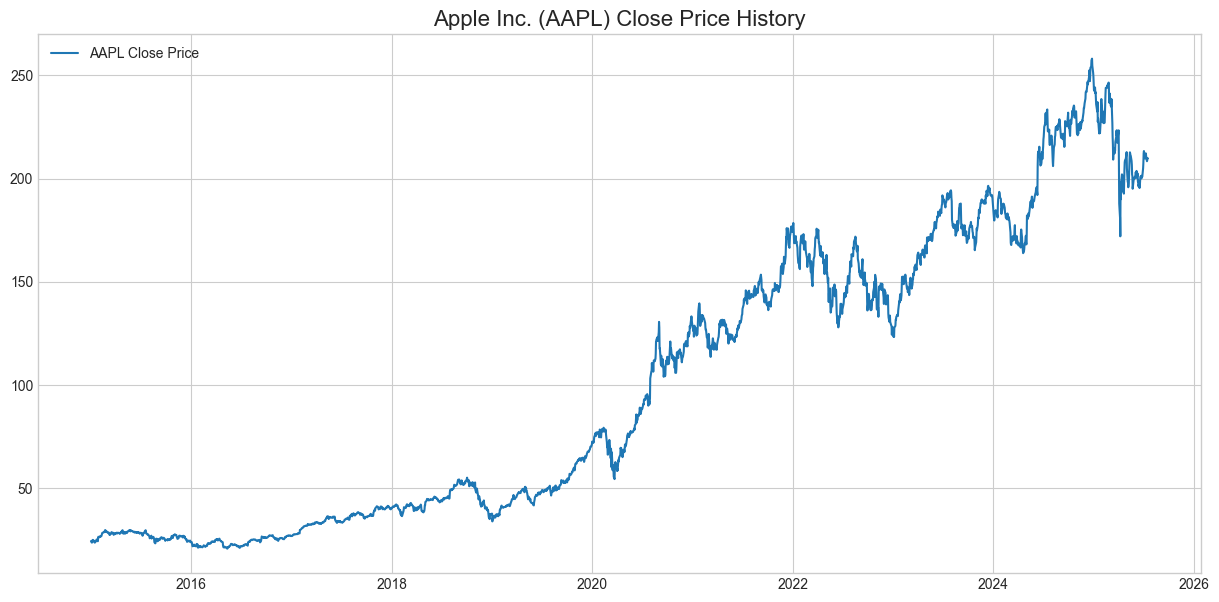

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(df['Close'], label='AAPL Close Price')
plt.title('Apple Inc. (AAPL) Close Price History', fontsize=16)
plt.legend()
plt.show()

In [4]:
def extract_local_extrema(prices_series):
    critical_points = []
    if len(prices_series) < 2: return critical_points
    critical_points.append((prices_series.index[0], float(prices_series.iloc[0])))
    prices_values = prices_series.values
    indices = prices_series.index
    for i in range(1, len(prices_values) - 1):
        if (prices_values[i] > prices_values[i-1] and prices_values[i] > prices_values[i+1]):
            critical_points.append((indices[i], float(prices_values[i])))
        elif (prices_values[i] < prices_values[i-1] and prices_values[i] < prices_values[i+1]):
            critical_points.append((indices[i], float(prices_values[i])))
    critical_points.append((prices_series.index[-1], float(prices_series.iloc[-1])))
    critical_points = sorted(list(set(critical_points)), key=lambda x: x[0])
    return critical_points

cpm.extract_local_extrema = extract_local_extrema
print("✅ CPM 모듈의 extract_local_extrema 함수가 노트북 내에서 성공적으로 재정의되었습니다.")

✅ CPM 모듈의 extract_local_extrema 함수가 노트북 내에서 성공적으로 재정의되었습니다.


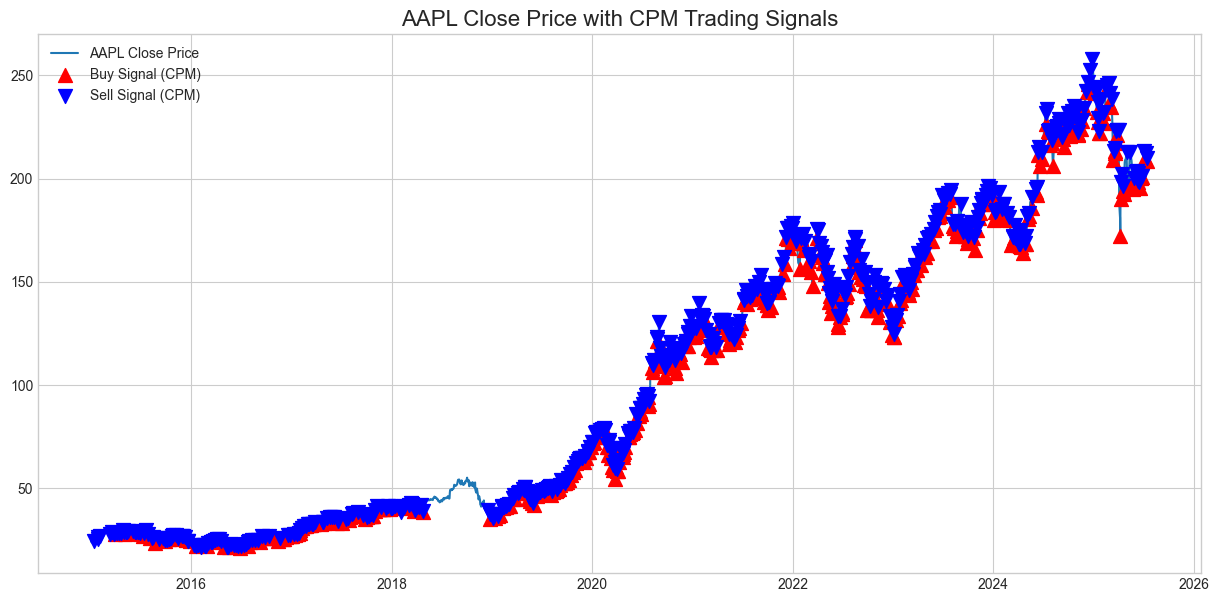

In [5]:
cpm_points, df_with_cpm = cpm.cpm_model(df, column='Close', P=0.05, T=5)

plt.figure(figsize=(15, 7))
plt.plot(df_with_cpm['Close'], label='AAPL Close Price', zorder=1)
buy_signals = df_with_cpm[df_with_cpm['cpm_point_type'] == -1]
sell_signals = df_with_cpm[df_with_cpm['cpm_point_type'] == 1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='red', s=100, label='Buy Signal (CPM)', zorder=2)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='blue', s=100, label='Sell Signal (CPM)', zorder=2)
plt.title('AAPL Close Price with CPM Trading Signals', fontsize=16)
plt.legend()
plt.show()

In [6]:
total_len = len(df_with_cpm)
train_end = int(total_len * 0.8)
train_df = df_with_cpm.iloc[:train_end]
print(f"개별 지표 최적화용 훈련 데이터: {len(train_df)}일")

개별 지표 최적화용 훈련 데이터: 2120일


In [7]:
print("--- 이동평균(MA) 파라미터 최적화 중... ---")
ma_best_params, _, _ = ma.run_MA_ga_optimization(train_df.copy())
print("\nMA 최적 파라미터:", ma_best_params)

--- 이동평균(MA) 파라미터 최적화 중... ---
이동평균 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/206 [00:00<?, ?bar/s]

gen	nevals	avg     	min  	max     
0  	50    	-939.979	-1000	0.687772


Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/640 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/668 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/201 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1055 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/254 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1800 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/772 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	46    	-839.991	-1000	0.581948


Backtest.run:   0%|          | 0/196 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1038 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/196 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/144 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/788 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/543 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/773 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/661 [00:00<?, ?bar/s]

2  	39    	-780.01 	-1000	0.607182


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1714 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1301 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/763 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/210 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/197 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/78 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/303 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/64 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/793 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/203 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/625 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/640 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/199 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/146 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/199 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/772 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/662 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/662 [00:00<?, ?bar/s]

3  	40    	-559.944	-1000	0.685698


Backtest.run:   0%|          | 0/640 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/292 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/770 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/777 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/774 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/779 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/143 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/661 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1928 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/299 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/195 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1907 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/54 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1921 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/539 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1364 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/645 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1814 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/215 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/637 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/202 [00:00<?, ?bar/s]

4  	32    	-259.814	-1000	0.982632


Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/642 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/640 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/639 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/292 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/210 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/382 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/638 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1812 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/247 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1268 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/785 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/676 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/194 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/639 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/195 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1816 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/630 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/776 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/290 [00:00<?, ?bar/s]

5  	37    	-39.7234	-1000	0.982632


Backtest.run:   0%|          | 0/1814 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1906 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/635 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1055 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/192 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2053 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1921 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1055 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/643 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1927 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1332 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/202 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/641 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/644 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/642 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/519 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/794 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/773 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1476 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/203 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/513 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/148 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/297 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1728 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

6  	44    	-79.5953	-1000	0.982632


Backtest.run:   0%|          | 0/944 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/631 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1918 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1825 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/634 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/540 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1816 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/511 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1317 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1476 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1476 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1476 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1908 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/794 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2031 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1932 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1929 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1223 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1913 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/772 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1801 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/794 [00:00<?, ?bar/s]

7  	38    	-39.5008	-1000	1.00603 


Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1934 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1462 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/770 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/795 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1936 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2039 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/764 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1223 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1476 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1825 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1821 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1827 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1931 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2047 [00:00<?, ?bar/s]

8  	41    	-59.4634	-1000	1.14057 


Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/947 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2069 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2068 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1944 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1914 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1939 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1916 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1932 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1315 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/297 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1825 [00:00<?, ?bar/s]

9  	35    	0.614027	-0.10636	1.12742 


Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/778 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/792 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1292 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2049 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1757 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/642 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1978 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1936 [00:00<?, ?bar/s]

10 	39    	0.67565 	-0.26625	1.1408  


Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1936 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1827 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1941 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1934 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2053 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1914 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1939 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1761 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1941 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1937 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

11 	39    	-19.2946	-1000   	1.19108 


Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2032 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1938 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1931 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1984 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1937 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1941 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1315 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1937 [00:00<?, ?bar/s]

12 	39    	-19.2822	-1000   	1.04167 


Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2032 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1316 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2048 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1330 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2067 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/786 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/993 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1825 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1981 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1912 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

13 	39    	0.769723	0.129286	1.24718 


Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1931 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2032 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1982 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1916 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/787 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1909 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1939 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1979 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1911 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1932 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2031 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2051 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1938 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/634 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

14 	44    	-19.3002	-1000   	1.24718 


Backtest.run:   0%|          | 0/791 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2027 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1940 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1939 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1757 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1938 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1905 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

15 	37    	0.762623	-0.115175	1.2429  


Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1934 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1316 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1931 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1937 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1331 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1936 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

16 	39    	-19.139 	-1000    	1.28189 


Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2030 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1292 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1317 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1983 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1943 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1312 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1915 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

17 	40    	0.857618	0.155718 	1.17647 


Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1316 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1945 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1947 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1934 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1934 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/785 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1826 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

18 	44    	-19.1193	-1000    	1.25871 


Backtest.run:   0%|          | 0/1293 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1723 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/540 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2021 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1278 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1946 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1930 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1757 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1932 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1408 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1329 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2031 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2026 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

19 	37    	0.883111	-0.452793	1.25871 


Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2031 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2046 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1936 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1327 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1279 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1942 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

20 	43    	-19.1194	-1000    	1.31158 


Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/792 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1325 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2028 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1328 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

21 	39    	0.927029	0.30582  	1.26335 


Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1326 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/789 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/784 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1827 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2045 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1939 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

22 	40    	0.987898	0.353789 	1.3709  


Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/785 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1275 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/785 [00:00<?, ?bar/s]

23 	37    	1.08535 	0.600476 	1.37122 


Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/786 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1324 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1318 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/992 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

24 	40    	-18.9115	-1000    	1.39864 


Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1323 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1276 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1277 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1319 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1320 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1935 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1321 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1322 [00:00<?, ?bar/s]

25 	42    	1.1505  	0.42783  	1.36196 

--- 이동평균 유전 알고리즘 결과 ---
최적의 파라미터 (N, n, a, b, c, atr, tp_r): [39, 17, 0.39952386322861466, 0.10465885745278249, 0.7880652196476619, 2.861698004237459, 2.159472984469023]
최고의 피트니스 (Sharpe Ratio 기반): 1.3986414026382077

MA 최적 파라미터: [39, 17, 0.39952386322861466, 0.10465885745278249, 0.7880652196476619, 2.861698004237459, 2.159472984469023]


In [ ]:
print("\n--- RSI 파라미터 최적화 중... ---")
rsi_best_params, _, _ = rsi.run_RSI_ga_optimization(train_df.copy())
print("\nRSI 최적 파라미터:", rsi_best_params)


--- RSI 파라미터 최적화 중... ---
RSI 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

gen	nevals	avg     	min  	max     
0  	50    	-240.087	-1000	0.655381


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

1  	34    	-80.0305	-1000	0.637293


Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

2  	42    	-99.7229	-1000	0.675987


Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1863 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1117 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1956 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

3  	42    	-119.698	-1000	0.712595


Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1957 [00:00<?, ?bar/s]

In [ ]:
print("\n--- ROC 파라미터 최적화 중... ---")
roc_best_params, _, _ = roc.run_roc_ga_optimization(train_df.copy())
print("\nROC 최적 파라미터:", roc_best_params)


--- ROC 파라미터 최적화 중... ---
ROC 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2073 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2074 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2074 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2077 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2070 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2071 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

gen	nevals	avg     	min      	max    
0  	50    	0.481872	-0.157211	1.08806


Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2074 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2105 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2069 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2069 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2077 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

1  	44    	0.643305	0.234351 	0.93045


Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2077 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

2  	40    	0.695757	0.152283 	0.997868


Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

3  	41    	0.712277	0.297339 	1.09864 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2101 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

4  	36    	0.78772 	0.31331  	1.09864 


Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2104 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

5  	44    	0.837582	0.489944 	1.06834 


Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

6  	36    	0.839071	0.313047 	1.03282 


Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2099 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

7  	40    	0.858768	0.534999 	1.03282 


Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2102 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

8  	42    	0.826156	0.318897 	1.07928 


Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

9  	41    	0.89239 	0.406069 	1.08571 


Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2079 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

10 	36    	0.938956	0.611515 	1.09817 


Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2095 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

11 	48    	0.879815	0.420771 	1.09191 


Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2098 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

12 	36    	0.944457	0.492096 	1.10969 


Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

13 	43    	0.990568	0.479235 	1.16669 


Backtest.run:   0%|          | 0/2097 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2082 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

14 	37    	1.03103 	0.48864  	1.13825 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2078 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

15 	40    	1.02759 	0.612212 	1.1332  


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2085 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

16 	39    	1.0648  	0.719203 	1.15975 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

17 	42    	1.07799 	0.727717 	1.15966 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2084 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

18 	50    	1.08348 	0.725289 	1.16316 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2096 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2086 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2088 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

19 	37    	1.08435 	0.717075 	1.17223 


Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2083 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2080 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

20 	38    	1.04946 	0.693892 	1.17223 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

21 	35    	1.06784 	0.633044 	1.17223 


Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2100 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

22 	33    	1.10445 	0.723671 	1.17223 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2092 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

23 	39    	1.11125 	0.503699 	1.19407 


Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2087 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2081 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2094 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2093 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

24 	44    	1.09597 	0.616263 	1.20013 


Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2091 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2089 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2090 [00:00<?, ?bar/s]

25 	42    	1.11529 	0.582668 	1.20013 

--- ROC 유전 알고리즘 결과 ---
최적의 파라미터 (period, thres, atr, tp_r): [29, 4.5526448364418, 1.5722475503491746, 2.6669269399530533]
최고의 피트니스 (Sharpe Ratio 기반): 1.2001253575957163

ROC 최적 파라미터: [29, 4.5526448364418, 1.5722475503491746, 2.6669269399530533]


In [ ]:
# 셀 11: CCI 파라미터 최적화
print("\n--- CCI 파라미터 최적화 중... ---")
cci_best_params, _, _ = cci.run_CCI_ga_optimization(train_df.copy())
print("\nCCI 최적 파라미터:", cci_best_params)


--- CCI 파라미터 최적화 중... ---
CCI 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2061 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2070 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

gen	nevals	avg      	min      	max    
0  	50    	0.0235765	-0.683452	0.70096


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2076 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

1  	39    	0.149756 	-0.554581	0.540442


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

2  	42    	0.135633 	-0.521543	0.841162


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

3  	36    	0.162777 	-0.732718	0.841162


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

4  	44    	0.313829 	-0.428198	0.841162


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

5  	37    	0.334735 	-0.57611 	0.860533


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

6  	42    	0.399806 	-0.295174	0.865745


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1995 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

7  	46    	0.462611 	-0.483518	0.921638


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

8  	40    	0.486752 	-0.129531	0.997985


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

9  	41    	0.531384 	0.00742062	0.997985


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

10 	37    	0.568303 	-0.813195 	0.997985


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

11 	41    	0.691573 	0.11513   	1.00179 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

12 	45    	0.675209 	-0.0581265	1.00429 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

13 	36    	0.80666  	-0.255519 	1.02297 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

14 	39    	0.906307 	-0.21294  	1.03004 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

15 	42    	0.942461 	0.535748  	1.03004 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

16 	38    	0.959927 	0.477     	1.03092 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

17 	45    	0.982935 	0.420616  	1.02641 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

18 	40    	1.00797  	0.833633  	1.03028 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

19 	42    	0.968139 	0.26446   	1.03224 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

20 	43    	0.984935 	0.432281  	1.03224 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

21 	45    	0.991842 	0.266591  	1.03216 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

22 	38    	1.00338  	0.43424   	1.03216 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

23 	41    	0.991354 	0.227995  	1.03405 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

24 	42    	0.96361  	0.399259  	1.03424 


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

25 	41    	0.945283 	0.0404299 	1.03424 

--- CCI 유전 알고리즘 결과 ---
최적의 파라미터 (tp, ob, os, atr, tp_r): [98, 216.23348691768012, -123.96834064319651, 3.705573659018391, 3.0]
최고의 피트니스 (Sharpe Ratio 기반): 1.0342432867452966

CCI 최적 파라미터: [98, 216.23348691768012, -123.96834064319651, 3.705573659018391, 3.0]


In [ ]:
print("\n--- MACD 파라미터 최적화 중... ---")
macd_best_params, _, _ = macd.run_MACD_ga_optimization(train_df.copy())
print("\nMACD 최적 파라미터:", macd_best_params)


--- MACD 파라미터 최적화 중... ---
MACD 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2052 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

gen	nevals	avg     	min    	max    
0  	50    	0.762997	0.14435	1.11045


Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

1  	43    	0.888653	0.426269	1.09462


Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

2  	42    	0.992237	0.547895	1.22214


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

3  	44    	1.01283 	0.722328	1.16686


Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2022 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

4  	41    	1.01621 	0.529867	1.17934


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

5  	43    	1.06833 	0.571316	1.26694


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2051 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

6  	37    	1.09856 	0.679329	1.21614


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

7  	42    	1.12617 	0.740183	1.27018


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

8  	44    	1.15396 	0.752606	1.23542


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

9  	38    	1.16113 	0.829791	1.28893


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

10 	42    	1.1513  	0.729408	1.27747


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

11 	38    	1.16696 	0.764867	1.27747


Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

12 	42    	1.14793 	0.727035	1.27487


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

13 	37    	1.14918 	0.705626	1.27487


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2023 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2040 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

14 	38    	1.17093 	0.689988	1.27487


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

15 	37    	1.1965  	0.754063	1.28372


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

16 	40    	1.17057 	0.757774	1.28944


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

17 	44    	1.17281 	0.747803	1.29335


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

18 	43    	1.15904 	0.753321	1.29113


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

19 	34    	1.18616 	0.726932	1.28924


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

20 	39    	1.21059 	0.821517	1.29289


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

21 	41    	1.20471 	0.78564 	1.29716


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

22 	30    	1.24305 	0.809585	1.29716


Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2044 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

23 	41    	1.23331 	0.823854	1.29774


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

24 	35    	1.24933 	0.72913 	1.29774


Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2043 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2041 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2042 [00:00<?, ?bar/s]

25 	40    	1.24706 	0.764933	1.29774

--- MACD 유전 알고리즘 결과 ---
최적의 파라미터 (fast, slow, sig, atr, tp_r): [17, 31, 14, 3.824512602113206, 2.3984184681901164]
최고의 피트니스 (Sharpe Ratio 기반): 1.2977407182232015

MACD 최적 파라미터: [17, 31, 14, 3.824512602113206, 2.3984184681901164]


In [ ]:
print("\n--- 볼린저 밴드(BB) 파라미터 최적화 중... ---")
bb_best_params, _, _ = bb.run_BB_ga_optimization(train_df.copy())
print("\nBB 최적 파라미터:", bb_best_params)


--- 볼린저 밴드(BB) 파라미터 최적화 중... ---
볼린저 밴드 유전 알고리즘 실행 중 (샤프 지수 최적화)...


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1786 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1787 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1504 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

gen	nevals	avg    	min  	max     
0  	50    	-20.213	-1000	0.277596


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2060 [00:00<?, ?bar/s]

1  	35    	-40.1374	-1000	0.277596


Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1958 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1340 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2062 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1504 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

2  	45    	-100.093	-1000	0.277596


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1969 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/824 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/2072 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

3  	37    	-20.0487	-1000	0.463989


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1968 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

4  	36    	-19.9145	-1000	0.463989


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1996 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

5  	38    	0.0507247	-0.831762	0.463989


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

6  	40    	0.18765  	-0.927082	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

7  	36    	0.19679  	-0.872549	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

8  	43    	0.189399 	-0.659928	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

9  	39    	0.121291 	-0.806153	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

10 	33    	0.250147 	-0.531287	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

11 	34    	0.282667 	-0.382422	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

12 	37    	0.275573 	-0.492124	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1971 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1970 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

13 	34    	0.202351 	-0.783707	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

14 	41    	0.280146 	-0.706719	0.400853


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

15 	38    	0.252459 	-0.609978	0.400853


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

16 	41    	0.232777 	-0.678081	0.426458


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

17 	42    	0.145348 	-0.749713	0.427783


Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

18 	42    	0.0911799	-0.773003	0.434394


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

19 	37    	0.212044 	-0.987466	0.434394


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

20 	42    	0.359052 	-0.602796	0.433774


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

21 	42    	0.410779 	0.144042 	0.441597


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

22 	35    	0.409736 	0.220466 	0.441597


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

23 	39    	0.355647 	-0.752434	0.444334


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

24 	42    	0.343092 	-0.851051	0.446157


Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1989 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/1988 [00:00<?, ?bar/s]

25 	37    	0.400536 	-0.53613 	0.450945

--- 볼린저 밴드 유전 알고리즘 결과 ---
최적의 파라미터 (tp, devup, devdn, atr, tp_r): [81, 1.5, 1.5, 1.7533111519972202, 1.41751619991526]
최고의 피트니스 (Sharpe Ratio 기반): 0.46398910583918973

BB 최적 파라미터: [81, 1.5, 1.5, 1.7533111519972202, 1.41751619991526]


In [ ]:
print("\n--- 전체 데이터프레임에 신호 컬럼 추가 중... ---")

# --- 수정: 모든 파라미터를 언패킹하되, 사용하지 않는 값은 _ 로 처리 ---
# 최적 파라미터 언패킹
final_N, final_n, final_a, final_b, final_c, _, _ = ma_best_params
final_x, final_overbought, final_oversold, _, _ = rsi_best_params
final_roc_period, final_roc_threshold, _, _ = roc_best_params
cci_timeperiod, cci_overbought, cci_oversold, _, _ = cci_best_params
bb_timeperiod, bb_nbdevup, bb_nbdevdn, _, _ = bb_best_params
macd_fast, macd_slow, macd_signal, _, _ = macd_best_params

# 전체 데이터프레임에 대한 신호 생성 (이 부분은 변경 없음)
ma_signals_full = ma.generate_MA_signals(df_with_cpm, final_N, final_n, final_a, final_b, final_c)
rsi_signals_full = rsi.generate_RSI_signals(df_with_cpm, final_x, final_overbought, final_oversold)
roc_signals_full = roc.generate_roc_signals(df_with_cpm, final_roc_period, final_roc_threshold)
cci_signals_full = cci.generate_CCI_signals(df_with_cpm, cci_timeperiod, cci_overbought, cci_oversold)
bb_signals_full = bb.generate_BB_signals(df_with_cpm, bb_timeperiod, bb_nbdevup, bb_nbdevdn)
macd_signals_full = macd.generate_MACD_signals(df_with_cpm, macd_fast, macd_slow, macd_signal)

# --- 수정: 신호 추가 로직을 가장 안정적인 방식으로 통일 ---
# 생성된 신호를 df_with_cpm에 새로운 컬럼으로 추가
all_signals = {
    'MA_Signals': ma_signals_full,
    'RSI_Signals': rsi_signals_full,
    'ROC_Signals': roc_signals_full,
    'CCI_Signals': cci_signals_full,
    'BB_Signals': bb_signals_full,
    'MACD_Signals': macd_signals_full
}

for col_name, signals_df in all_signals.items():
    df_with_cpm[col_name] = 0
    if not signals_df.empty:
        signal_map = signals_df.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
        # .reindex(df_with_cpm.index)를 사용하여 인덱스를 맞추고 .fillna(0)로 빈 값을 채움
        df_with_cpm[col_name] = signal_map.reindex(df_with_cpm.index).fillna(0)

print("신호 컬럼 추가 완료.")
print("각 신호별 발생 횟수:")
print(df_with_cpm[['MA_Signals', 'RSI_Signals', 'ROC_Signals','CCI_Signals','BB_Signals','MACD_Signals']].ne(0).sum())


--- 전체 데이터프레임에 신호 컬럼 추가 중... ---
신호 컬럼 추가 완료.
각 신호별 발생 횟수:
MA_Signals       37
RSI_Signals      11
ROC_Signals      53
CCI_Signals      11
BB_Signals       30
MACD_Signals    135
dtype: int64


--- 피처(기술적 지표) 중요도 ---
BB_Signals      0.219531
MACD_Signals    0.206653
ROC_Signals     0.169592
MA_Signals      0.145526
CCI_Signals     0.141934
RSI_Signals     0.116764
dtype: float64


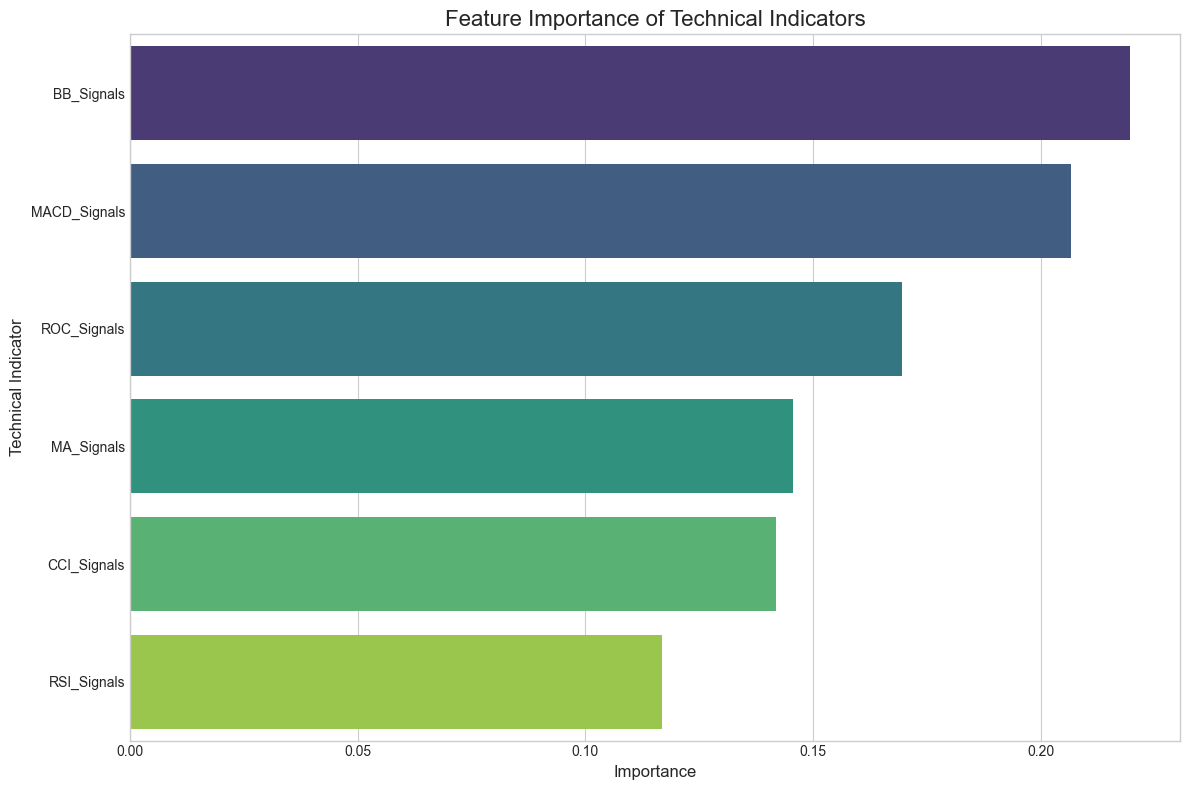

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# --- 1. 분석용 데이터 준비 ---
# ESN 모델과 동일한 훈련 데이터를 사용합니다.
# 단, NaN 값이 있는 행은 분석에서 제외합니다.
features = ['MA_Signals', 'RSI_Signals', 'ROC_Signals', 'CCI_Signals', 'BB_Signals', 'MACD_Signals']
target = 'cpm_point_type'

# ESN과 동일하게 Target을 한 칸 앞당겨 '미래'를 예측하도록 설정
df_analysis = df_with_cpm.copy()
df_analysis['Target'] = df_analysis[target].shift(-1)
df_analysis.dropna(subset=features + ['Target'], inplace=True)

# 훈련 데이터셋 정의 (기존 train_df와 동일한 구간 사용)
X_train_rf = df_analysis.loc[train_df.index, features].copy()
y_train_rf = df_analysis.loc[train_df.index, 'Target'].copy()


# --- 2. RandomForest 모델 초기화 및 훈련 ---
# ESN 대신, 피처 중요도 분석을 위해 RandomForest를 임시로 사용합니다.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_rf, y_train_rf)


# --- 3. 피처 중요도 추출 및 확인 ---
importances = rf_model.feature_importances_
feature_importance_df = pd.Series(importances, index=features).sort_values(ascending=False)

print("--- 피처(기술적 지표) 중요도 ---")
print(feature_importance_df)


# --- 4. 피처 중요도 시각화 ---
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_df.values, y=feature_importance_df.index, palette='viridis')
plt.title('Feature Importance of Technical Indicators', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Technical Indicator', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# 사용할 기술적 지표 컬럼 이름 리스트
Technical_Signals = ['MA_Signals', 'RSI_Signals', 'ROC_Signals',  'CCI_Signals','BB_Signals','MACD_Signals']

# 변수명을 all_fold_stats 로 변경하여 모든 폴드의 통계를 받습니다.
best_params_cv, cv_returns, all_fold_stats, last_fold_signals = ESN_GA.esn_rolling_forward(
    df=df_with_cpm,
    technical_signals_list=Technical_Signals,
    n_splits_cv=5, 
    n_splits_forward=3,
    pop_size=50,
    num_generations=15,
    random_seed=42,
    initial_train_ratio=0.7 
)

--- 5-분할 교차 검증으로 파라미터 최적화 시작 ---

--- CV Fold 1/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg      	std    	min	max    
0  	50    	-0.583795	1.63987	-10	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	35    	0.0976044	0.979461	-1.87254	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	41    	0.244126 	1.03699 	-2.57753	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	43    	0.148345 	1.03735 	-1.84769	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	33    	0.767606 	0.853158	-1.58566	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	42    	1.04998  	0.821127	-1.38412	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	39    	1.21073  	0.749433	-1.22003	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	41    	1.33321  	0.609786	-0.829126	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	35    	1.2783   	0.731577	-2.13087 	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	38    	1.47864  	0.422118	-0.673432	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	38    	1.47253  	0.43067 	-1.05958 	1.60767


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	38    	1.03645  	0.902626	-2.04464 	1.60767


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	46    	1.28636  	0.613995	-0.791042	1.60767


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	42    	1.3315   	0.712016	-1.72473 	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	46    	1.23029  	0.768288	-1.29851 	1.57901


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	34    	1.36287  	0.593857	-1.62701 	1.59616
Fold 1 최적 후보: [187.0, 0.7557760867979382, 0.4379176362956818, 0.1708133456347422, 4.351146351835292, 2.751705880756388]

--- CV Fold 2/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg      	std    	min     	max    
0  	50    	0.0445967	0.67486	-1.43299	1.40033


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	43    	0.317292 	0.699563	-1.63677	1.78355


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	44    	0.42237  	0.648065	-1.31274	1.78355


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	42    	0.628078 	0.818638	-1.15517	1.97573


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	42    	0.733547 	0.71583 	-1.23383	1.82605


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	45    	0.503391 	0.903831	-1.69344	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	38    	0.778308 	0.816136	-1.22934	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	30    	1.12938  	0.818865	-1.18226	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	39    	1.30648  	0.766017	-1.26966	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	38    	1.55329  	0.52554 	-0.738447	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	36    	1.63211  	0.344973	0.108294 	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	42    	1.55194  	0.696108	-1.64828 	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	39    	1.67644  	0.36003 	-0.685438	1.75535


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	45    	1.61737  	0.438415	-0.449044	1.92536


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	40    	1.60086  	0.382911	-0.0427543	1.92536


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	46    	1.53674  	0.490443	-0.642789 	1.75535
Fold 2 최적 후보: [148.16769934587828, 0.9219526877466839, 0.2946221771723487, 0.11086619329135, 2.2498481281875495, 1.995914552132375]

--- CV Fold 3/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg     	std     	min     	max    
0  	50    	0.019805	0.766634	-1.21167	1.85983


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	41    	0.456957	0.649568	-0.800933	1.92706


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	34    	0.572288	0.822967	-0.993463	1.92706


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	41    	1.11155 	0.761394	-0.88974 	2.82599


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	40    	1.19338 	0.837926	-0.700742	2.75856


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	47    	1.40995 	0.813145	-0.727782	2.75856


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	48    	1.23099 	0.865843	-0.950369	2.59451


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	44    	1.46682 	0.73284 	-0.535012	2.66124


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	45    	1.72954 	0.693751	-1.04337 	2.63676


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	41    	1.79187 	0.60801 	-0.540376	2.63676


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	42    	1.63995 	0.985978	-1.19369 	2.76101


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	38    	2.16207 	0.510957	0.895202 	2.76433


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	41    	2.34451 	0.457953	0.749968 	2.84275


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	43    	2.46832 	0.504231	0.537675 	2.94079


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	39    	2.58043 	0.393116	0.516684 	2.94385


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	48    	2.33773 	0.830149	-1.26767 	2.94385
Fold 3 최적 후보: [98.62121095363003, 0.9573826178781514, 0.5793248768825189, 0.17749814862804947, 2.1106152702796592, 2.306751319070451]

--- CV Fold 4/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg     	std     	min     	max   
0  	50    	0.300448	0.721408	-1.27499	1.8885


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	41    	0.54127 	0.686911	-0.72653	1.94367


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	41    	0.539243	0.698896	-1.59765	1.8885 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	39    	0.650409	0.69086 	-1.03589	1.8885 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	46    	0.533784	0.70734 	-0.788191	2.10891


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	37    	0.725171	0.76162 	-0.656723	2.10891


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	38    	0.714902	0.779642	-0.838368	1.8885 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	39    	0.855224	0.82235 	-1.26655 	1.92751


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	34    	0.87532 	0.859462	-0.840521	1.92751


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	36    	0.991286	0.802861	-0.721915	1.92751


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	37    	1.02911 	0.942269	-1.22309 	1.92751


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	43    	1.2707  	0.887122	-1.22032 	1.93118


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	43    	1.67781 	0.530271	-0.375858	1.98564


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	40    	1.73004 	0.504283	-0.25406 	2.00177


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	43    	1.88376 	0.28655 	0.0201428	2.0055 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	43    	1.89266 	0.244131	0.779912 	2.01374
Fold 4 최적 후보: [236.0, 0.90510997856372, 0.5415598799135845, 0.24620863707187593, 1.9210446711541185, 2.2130981900744517]

--- CV Fold 5/5 (후보 파라미터 탐색) ---


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

gen	nevals	avg      	std     	min    	max    
0  	50    	-0.704298	0.682234	-1.8367	1.05429


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

1  	41    	-0.338141	0.753557	-1.88081	1.48301


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

2  	40    	-0.0890883	0.897852	-2.16066	1.48301


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

3  	37    	0.0294256 	0.860602	-1.75119	1.48301


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

4  	44    	0.282743  	0.941732	-2.06153	1.62504


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

5  	42    	0.168622  	1.07991 	-2.34482	1.7693 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

6  	41    	0.446967  	0.886026	-1.62149	1.7693 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

7  	37    	0.429267  	1.0311  	-1.87225	1.7693 


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

8  	37    	0.729082  	1.10719 	-1.87225	1.88322


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

9  	42    	1.22884   	0.9808  	-1.83093	1.88233


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

10 	41    	1.49326   	0.723463	-1.12052	1.88325


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

11 	41    	1.67307   	0.598219	-1.15262	2.03011


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

12 	42    	1.70698   	0.585338	-1.23835	2.11874


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

13 	44    	1.61646   	0.825115	-1.40533	2.11874


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

14 	44    	1.7548    	0.681566	-1.19582	2.11874


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

15 	34    	1.84282   	0.686048	-1.32153	2.11932
Fold 5 최적 후보: [234.89125584735768, 1.1027167448561397, 0.6804656890269636, 0.18162798739398842, 4.275134635146085, 2.8566290737105633]

후보 파라미터 교차 평가 시작...
  -> 후보 1 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 1의 5개 Fold 평균 점수: 0.3062
  -> 후보 2 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 2의 5개 Fold 평균 점수: 0.0283
  -> 후보 3 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 3의 5개 Fold 평균 점수: 0.2703
  -> 후보 4 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 4의 5개 Fold 평균 점수: 0.0337
  -> 후보 5 평가 중...


Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/294 [00:00<?, ?bar/s]

  후보 5의 5개 Fold 평균 점수: 0.3665

교차 검증 기반 파라미터 최적화 완료!
최종 선택된 최적 파라미터: [234.89125584735768, 1.1027167448561397, 0.6804656890269636, 0.18162798739398842, 4.275134635146085, 2.8566290737105633]
(후보 5의 평균 점수가 0.3665로 가장 높았습니다)


--- 3-분할 롤링 포워드 최종 성능 검증 시작 ---

--- Forward Fold 1/3 ---


Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2022-05-13 00:00:00
End                       2023-06-02 00:00:00
Duration                    385 days 00:00:00
Exposure Time [%]                    33.58491
Equity Final [$]                   9239.28624
Equity Peak [$]                   11421.43589
Commissions [$]                     956.39747
Return [%]                           -7.60714
Buy & Hold Return [%]                25.21013
Return (Ann.) [%]                    -7.24783
Volatility (Ann.) [%]                12.36935
CAGR [%]                             -5.04698
Sharpe Ratio                         -0.58595
Sortino Ratio                        -0.75326
Calmar Ratio                         -0.37935
Alpha [%]                            -12.1719
Beta                                  0.18107
Max. Drawdown [%]                   -19.10574
Avg. Drawdown [%]                    -4.35605
Max. Drawdown Duration      289 days 00:00:00
Avg. Drawdown Duration       61 days 00:00:00
# Trades                

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2023-06-05 00:00:00
End                       2024-06-24 00:00:00
Duration                    385 days 00:00:00
Exposure Time [%]                    35.09434
Equity Final [$]                  11398.93783
Equity Peak [$]                   11865.37452
Commissions [$]                     459.62176
Return [%]                           13.98938
Buy & Hold Return [%]                12.94079
Return (Ann.) [%]                    13.25954
Volatility (Ann.) [%]                14.38656
CAGR [%]                              8.94827
Sharpe Ratio                          0.92166
Sortino Ratio                          1.7185
Calmar Ratio                          1.73692
Alpha [%]                              9.4681
Beta                                  0.34938
Max. Drawdown [%]                    -7.63394
Avg. Drawdown [%]                    -2.67562
Max. Drawdown Duration       95 days 00:00:00
Avg. Drawdown Duration       24 days 00:00:00
# Trades                

Backtest.run:   0%|          | 0/250 [00:00<?, ?bar/s]


백테스팅 결과:
Start                     2024-06-25 00:00:00
End                       2025-07-16 00:00:00
Duration                    386 days 00:00:00
Exposure Time [%]                    58.49057
Equity Final [$]                    9899.3229
Equity Peak [$]                   11054.65672
Commissions [$]                     240.86669
Return [%]                           -1.00677
Buy & Hold Return [%]                -10.0831
Return (Ann.) [%]                    -0.95762
Volatility (Ann.) [%]                18.49274
CAGR [%]                             -0.65842
Sharpe Ratio                         -0.05178
Sortino Ratio                        -0.07166
Calmar Ratio                         -0.06953
Alpha [%]                             2.26415
Beta                                   0.3244
Max. Drawdown [%]                   -13.77297
Avg. Drawdown [%]                    -3.90148
Max. Drawdown Duration      202 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                

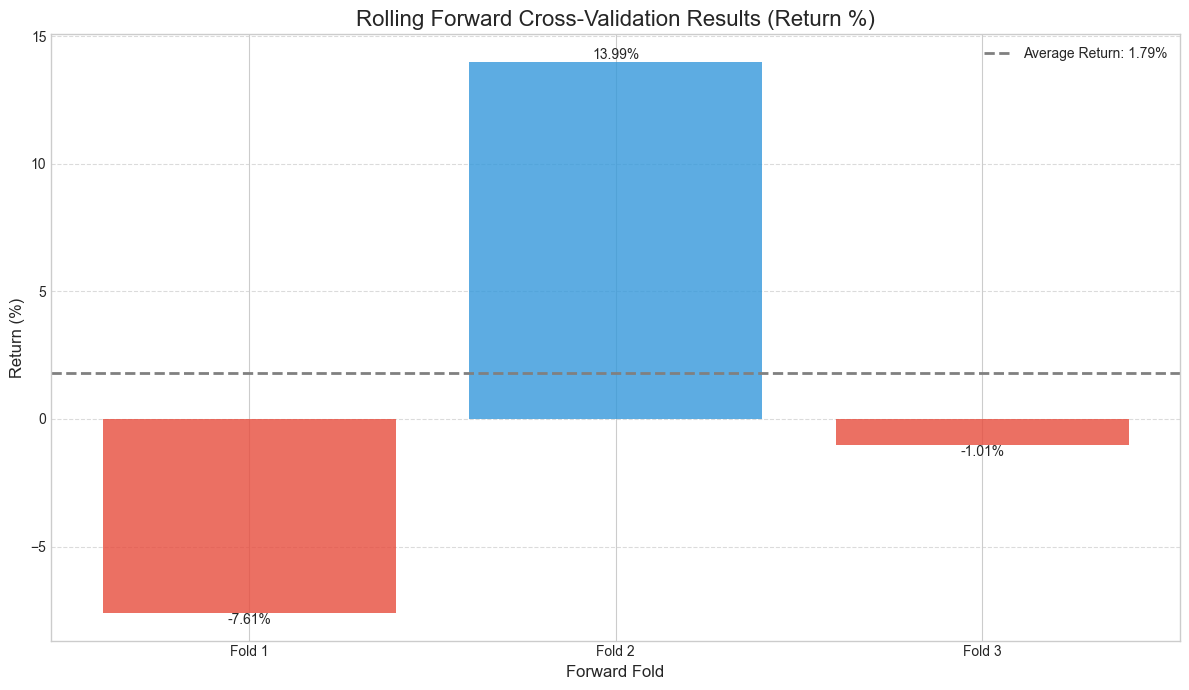


--- Forward Fold 1 Backtest Statistics (Full) ---
Start                                                   2022-05-13 00:00:00
End                                                     2023-06-02 00:00:00
Duration                                                  385 days 00:00:00
Exposure Time [%]                                                 33.584906
Equity Final [$]                                                9239.286242
Equity Peak [$]                                                11421.435888
Commissions [$]                                                  956.397466
Return [%]                                                        -7.607138
Buy & Hold Return [%]                                             25.210128
Return (Ann.) [%]                                                 -7.247829
Volatility (Ann.) [%]                                             12.369347
CAGR [%]                                                          -5.046979
Sharpe Ratio                         

In [ ]:
# 교차 검증 결과 시각화
if 'cv_returns' in locals() and cv_returns:
    fold_labels = [f'Fold {i+1}' for i in range(len(cv_returns))]
    mean_return = np.mean(cv_returns)
    
    plt.figure(figsize=(12, 7))
    colors = ['#3498db' if x >= 0 else '#e74c3c' for x in cv_returns]
    bars = plt.bar(fold_labels, cv_returns, color=colors, alpha=0.8)
    
    plt.axhline(mean_return, color='grey', linestyle='--', linewidth=2, label=f'Average Return: {mean_return:.2f}%')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', 
                 va='bottom' if yval >=0 else 'top', ha='center', fontsize=10)

    plt.title('Rolling Forward Cross-Validation Results (Return %)', fontsize=16)
    plt.xlabel('Forward Fold', fontsize=12)
    plt.ylabel('Return (%)', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("cv_returns 변수가 없거나 비어있어 시각화를 진행할 수 없습니다.")

# --- 수정된 부분 ---
# 'all_fold_stats' 변수를 사용하여 결과 출력
if 'all_fold_stats' in locals() and all_fold_stats:
    for i, fold_stat in enumerate(all_fold_stats):
        print(f"\n--- Forward Fold {i+1} Backtest Statistics (Full) ---")
        # .to_string()을 사용하여 전체 내용 출력
        print(fold_stat.to_string())
else:
    print("\n상세 통계 결과가 없습니다.")